In [3]:
import numpy as np
import pandas as pd
import os

# Specify the directory path where your images are located
image_directory = "F:\\Python projects\\drowsy\\archive"

# List all files in the specified directory
for filename in os.listdir(image_directory):
    if os.path.isfile(os.path.join(image_directory, filename)):
        print(os.path.join(image_directory, filename))


In [4]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

In [5]:
X = []
Y = []

for i in tqdm(glob('F:/Python projects/drowsy/archive/train/Open_Eyes/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(1)
    
for i in tqdm(glob('F:/Python projects/drowsy/archive/train/Closed_Eyes/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(0)    

100%|██████████| 2000/2000 [00:04<00:00, 449.25it/s]


In [6]:
X = np.array(X)
X = X/255.0
Y = np.array(Y)

In [7]:
X.shape

(4000, 64, 64)

In [8]:
X = np.expand_dims(X,-1)

In [9]:
X.shape

(4000, 64, 64, 1)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

In [12]:
model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [14]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel.keras',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)
model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=callback)

Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.8800 - loss: 0.2597
Epoch 1: val_loss improved from inf to 0.88392, saving model to bestModel.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 34s 321ms/step - accuracy: 0.8810 - loss: 0.2579 - val_accuracy: 0.5187 - val_loss: 0.8839
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.9742 - loss: 0.0661
Epoch 2: val_loss did not improve from 0.88392
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 274ms/step - accuracy: 0.9743 - loss: 0.0657 - val_accuracy: 0.5187 - val_loss: 1.1816
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.9905 - loss: 0.0302
Epoch 3: val_loss did not improve from 0.88392
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 307ms/step - accuracy: 0.9905 - loss: 0.0301 - val_accuracy: 0.5187 - val_loss: 2.6640
Epoch 4/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.9922 - loss: 0.0336
Epoch 4: val_loss improved from 0.88392 to 0.30312, saving model to bestModel.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 322ms/step - 

In [18]:
from keras.models import save_model
save_model(model, 'detection.h5')

In [15]:
from keras.models import load_model
best_model = load_model('F:/Python projects/drowsy/bestModel.keras')
best_model.evaluate(x_test, y_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9990 - loss: 0.0032


[0.006511444691568613, 0.9977272748947144]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


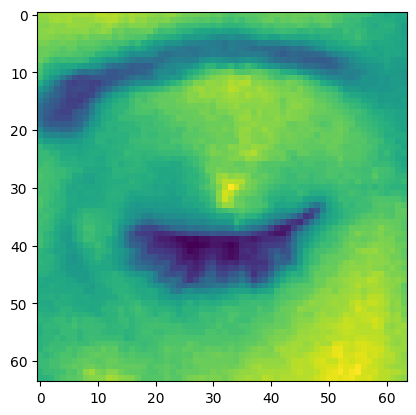

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


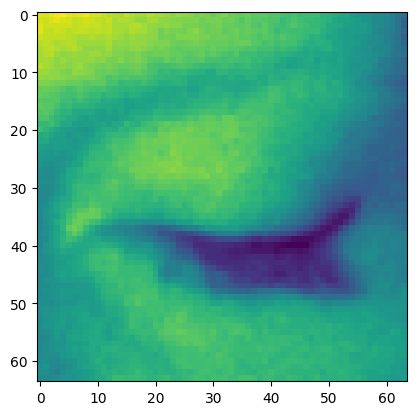

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


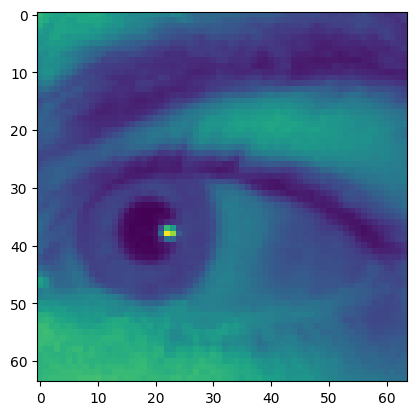

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


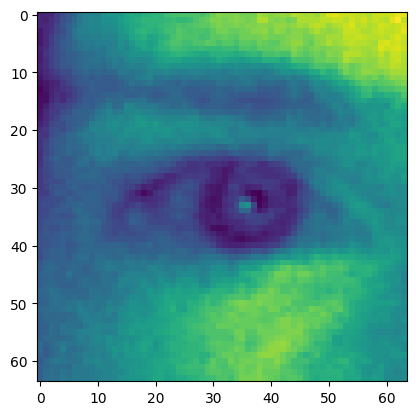

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


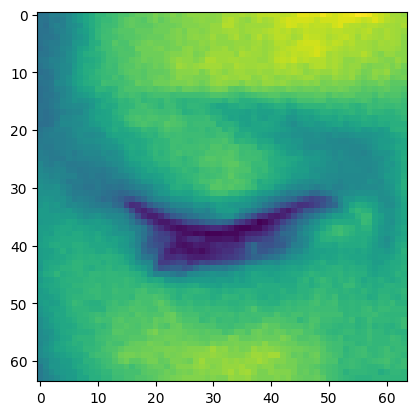

Closed


In [16]:
for i in x_test[10:15]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print("Closed")

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step


Text(0.5, 25.722222222222214, 'Actual')

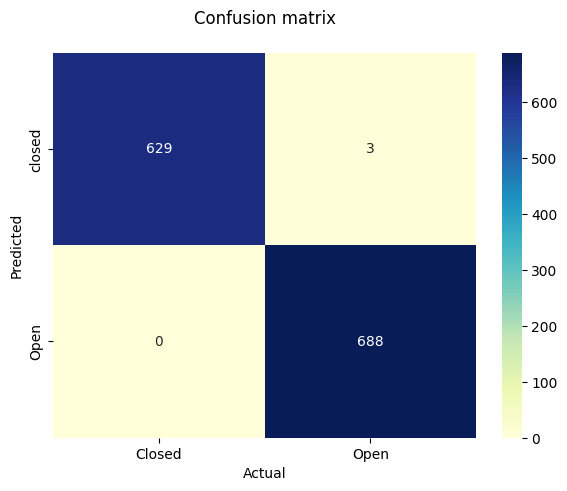

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")